Enter timestep dt in seconds: 1
1) rk4; 2)Euler: 2


<IPython.core.display.Javascript object>


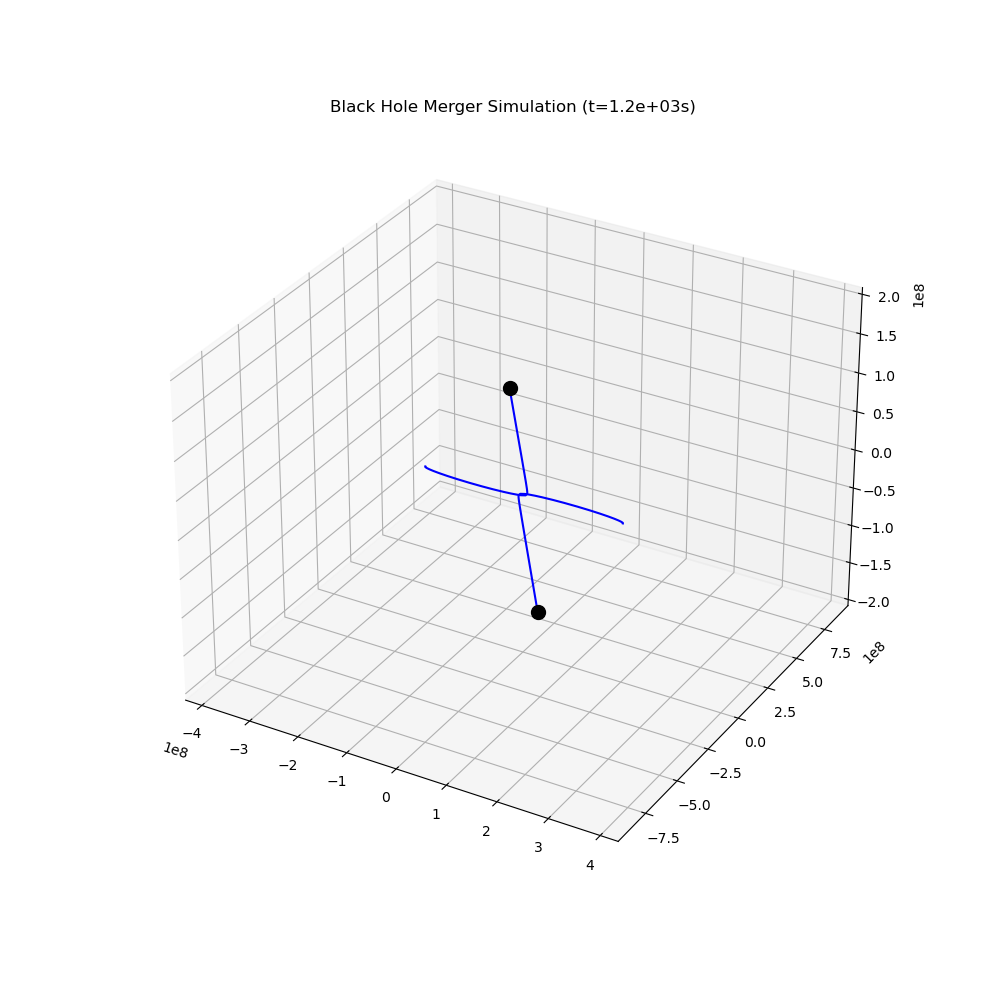

In [29]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.embed_limit'] = 50

masses = [1e30, 1e30]  # Masses of the black holes, not relative to real black holes

def black_hole_odes(t, y, masses):
    dx = y[6] - y[0]
    dy = y[7] - y[1]
    dz = y[8] - y[2]
    r = np.sqrt(dx**2 + dy**2 + dz**2)
    
    G = 6.67430e-11
    fx = G * masses[0] * masses[1] * (dx / r**3)
    fy = G * masses[0] * masses[1] * (dy / r**3)
    fz = G * masses[0] * masses[1] * (dz / r**3)

    return np.array([y[3], y[4], y[5], fx/masses[0], fy/masses[0], fz/masses[0], y[9], y[10], y[11], -fx/masses[1], -fy/masses[1], -fz/masses[1]])

# Adjust the simulation parameters
dt = eval(input('Enter timestep dt in seconds: '))  # (sec)
t_final = 5e3

def rk4_step(t, y, dt, masses):
    k1 = dt * black_hole_odes(t, y, masses)
    k2 = dt * black_hole_odes(t + 0.5 * dt, y + 0.5 * k1, masses)
    k3 = dt * black_hole_odes(t + 0.5 * dt, y + 0.5 * k2, masses)
    k4 = dt * black_hole_odes(t + dt, y + k3, masses)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def euler_step(t, y, dt, masses):
    return y + dt * black_hole_odes(t, y, masses)

def solver(ode_solve):
    if ode_solve == 1:  ### rk4 Method ###
        return rk4_step
    elif ode_solve == 2:  ### euler Method ###
        return euler_step
    else:
        raise ValueError('Incorrect index chosen for method. Must choose 1 or 2')

ode_solve = input('1) rk4; 2)Euler: ')
solver_func = solver(int(ode_solve))  # Convert the input to an integer and get a function

# Initial conditions
y0 = np.array([2e8, 0, 0, 0, 5e4, 0, -2e8, 0, 0, 0, -5e4, 0])

# Simulation
t_values = np.arange(0, t_final, dt)

positions = [y0[[0, 1, 2, 6, 7, 8]].reshape(2, 3)]
y = y0

#NEED TO FIX
for t in t_values:
    y = solver_func(t, y, dt, masses)  # Use the selected solver function
    pos = y[[0, 1, 2, 6, 7, 8]].reshape(2, 3)
    positions.append(pos)  # append new positions

# Visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert the list of positions to a numpy array for easier slicing
positions = np.array(positions)
# Create empty lists to hold the paths of the black holes
paths = [[positions[0][0]], [positions[0][1]]]

def update(frame):
    ax.clear()

    # Determine the plot limits based on the current black hole positions
    x_min, x_max = np.min(positions[frame, :, 0]), np.max(positions[frame, :, 0])
    y_min, y_max = np.min(positions[frame, :, 1]), np.max(positions[frame, :, 1])
    z_min, z_max = np.min(positions[frame, :, 2]), np.max(positions[frame, :, 2])

    padding = 2e8
    ax.set_xlim(x_min - padding, x_max + padding)
    ax.set_ylim(y_min - padding, y_max + padding)
    ax.set_zlim(z_min - padding, z_max + padding)

    for i, pos in enumerate(positions[frame]):
        ax.scatter(*pos, s=100, c='black')

        # Add the current position to the path of this black hole
        paths[i].append(pos)

        # Plot the path of this black hole
        ax.plot(*np.array(paths[i]).T, color='blue')
        

    plt.title(f"Black Hole Merger Simulation (t={t_values[frame]:.1e}s)")
    
# Set the animation parameters
frame_step = 5

ani = FuncAnimation(fig, update, frames=range(0, len(t_values), frame_step), interval=10)
# save the animation as gif file 
#ani.save('Euler.gif',fps=60) 

plt.show()